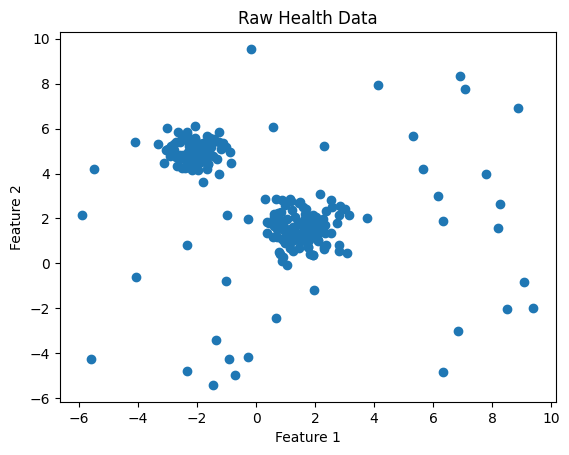

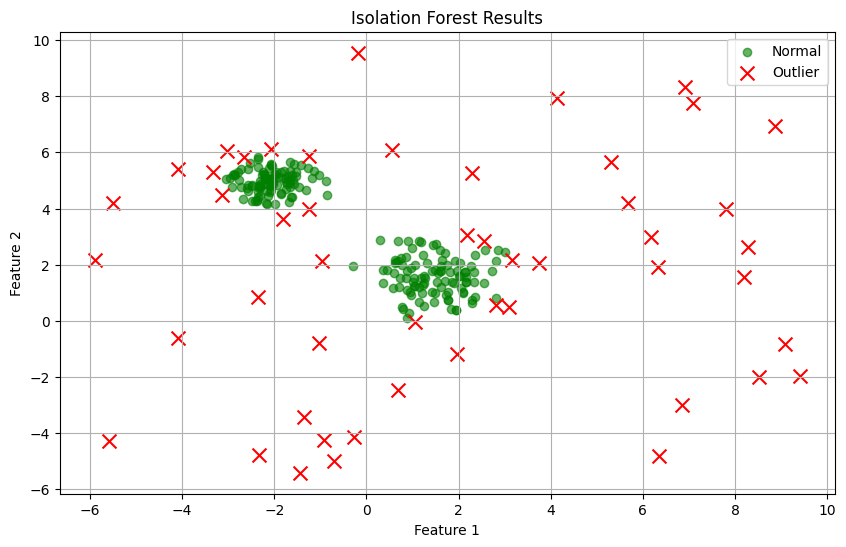

In [ ]:
# Step 1️⃣: Import Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
# numpy, pandas: For numerical and data manipulation.
# matplotlib.pyplot: For plotting the data.
# IsolationForest: From scikit-learn, used for detecting anomalies.

# Step 2️⃣: Create or Load Sample Data
df = pd.read_csv("healthcare.csv")
df.head()
# | Index | 0         | 1        |
# | ----- | --------- | -------- |
# | 0     | 1.616671  | 1.944522 |
# | 1     | 1.256461  | 1.609444 |
# | 2     | -2.343919 | 4.392961 |
# | 3     | 1.195393  | 2.794485 |
# | 4     | -3.329586 | 5.303160 |

# Step 3. Visualize the Data
 
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.title("Raw Health Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
# This scatter plot shows clusters of healthy patients.
# Outliers (points far away) may be sick patients.

# 4. Apply Isolation Forest
clf = IsolationForest(contamination=0.2)  # assuming 20% data could be outliers
clf.fit(df)
predictions = clf.predict(df)
predictions
# array([ 1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

# 🔍 What happens here?
# contamination=0.2: You expect 20% of the data to be outliers.
# fit(df): Builds the model.
# predict(df): Predicts if each point is normal (1) or an outlier (-1).

# 5. Identify Outlier Indexes
 
outlier_index = np.where(predictions == -1)
outlier_index
# array([  4,  20,  24,  45,  48,  49,  53,  55,  60,  61,  62,  63,  67,
#          72,  74,  78,  83,  85,  87,  89,  92,  97, 104, 108, 114, 119,
#         126, 130, 132, 133, 141, 151, 160, 167, 177, 179, 181, 182, 187,
#         199, 204, 209, 212, 217, 220, 221, 227, 242, 247, 248])

# This gives the row numbers where the model detected outliers.

# 7. Plot the Results
# Mark normal and outlier points
normal_data = df[predictions == 1]
outliers = df[predictions == -1]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(normal_data.iloc[:, 0], normal_data.iloc[:, 1], 
            color='green', label='Normal', alpha=0.6)
plt.scatter(outliers.iloc[:, 0], outliers.iloc[:, 1], 
            color='red', label='Outlier', marker='x', s=100)
plt.title("Isolation Forest Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


# normal_data.iloc[:, 0]: selects Feature 1 (all rows, first column).
# normal_data.iloc[:, 1]: selects Feature 2 (all rows, second column).
# color='green': makes the normal points green.
# label='Normal': sets the legend label to "Normal".
# alpha=0.6: sets the transparency of the points to 60% (slightly see-through for better layering).










